<a href="https://colab.research.google.com/github/Ilhom-Utkirov/data_science/blob/main/Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%cd /content/drive/MyDrive/emotion_recognition2/summer_2022_project2/summer_2022_project

/content/drive/MyDrive/emotion_recognition2/summer_2022_project2/summer_2022_project


In [ ]:
general_path = '/content/drive/MyDrive/emotion_recognition2/summer_2022_project2/summer_2022_project/audio'

In [ ]:
y, sr = librosa.load(f'/content/drive/MyDrive/emotion_recognition/audio/esame/summer_2022_project/audio/3.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [-3.1368199e-05 -3.7816084e-05 -3.5207177e-05 ...  3.4725770e-06
  1.6058891e-06  0.0000000e+00] 

y shape: (75050,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


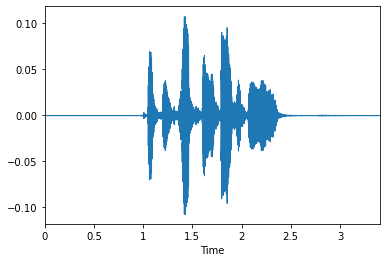

In [ ]:
librosa.display.waveplot(y,sr)

In [ ]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [-3.1368199e-05 -3.7816084e-05 -3.5207177e-05 ...  3.4725770e-06
  1.6058891e-06  0.0000000e+00] 

Audio File shape: (75050,)


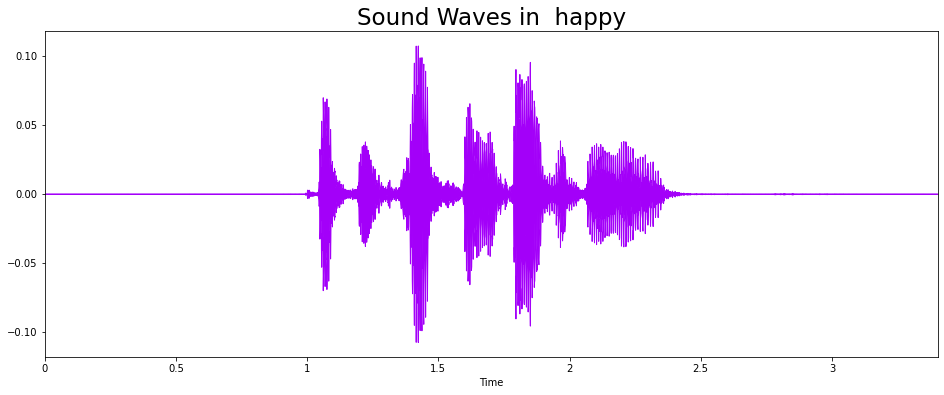

In [ ]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in  happy", fontsize = 23);

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 147)


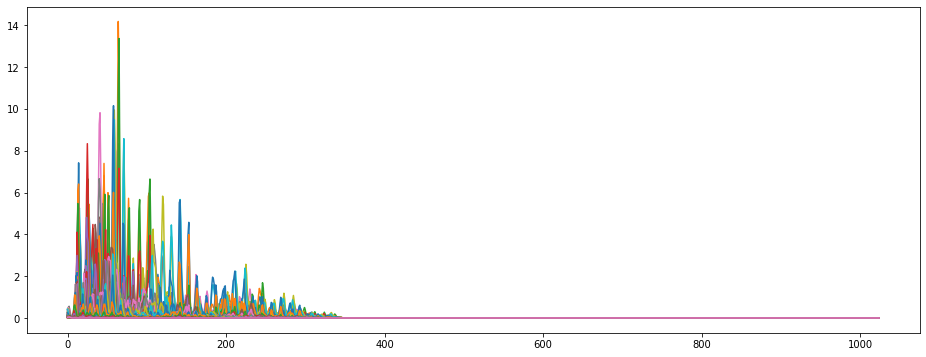

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(D);

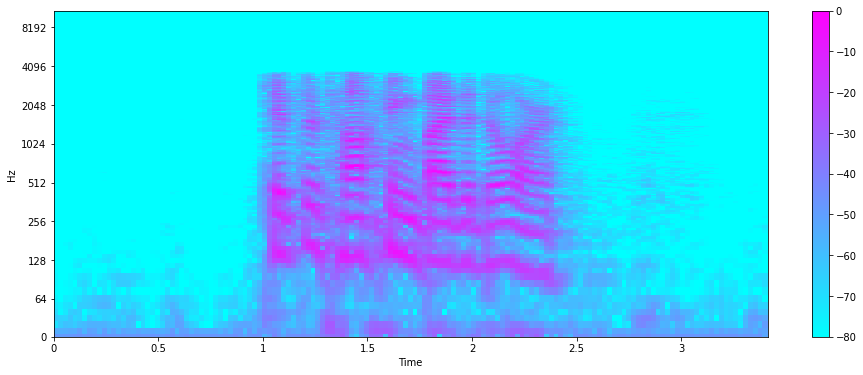

In [ ]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

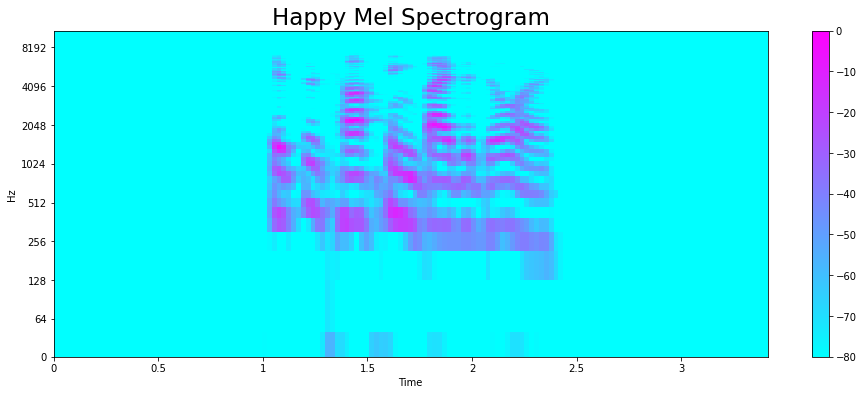

In [ ]:
y, sr = librosa.load(f'/content/drive/MyDrive/emotion_recognition/audio/esame/summer_2022_project/audio/3.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Happy Mel Spectrogram", fontsize = 23);

In [ ]:
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

2611


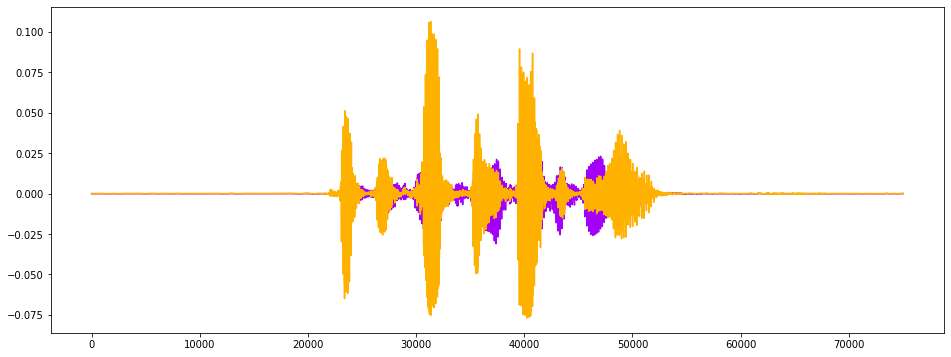

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

In [ ]:
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

75.99954044117646

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1169.41787242 1194.20207127 1040.75335429 1011.72928305 1006.13560863
  892.6824366   977.50281192  891.26106912  944.81060152 1004.76953566
  867.2512945   965.51128532  958.74584075 1062.61469177  896.26020305
  833.43853942  915.98389202  973.52117842  939.79887058  896.89534047
  934.9027938  1020.51170913 1020.68370479  910.09674814  801.33667591
  878.34519931  853.18098307  963.72386376 1079.17937043  942.52202845
  986.31973186  987.50509202 1009.02409039 1104.70664298 1138.76427209
 1054.71087303 1015.38749212  881.12648477  952.61731252 1106.95127054
  834.00338177  822.21422845 1453.41006939 1498.16581477 1084.59396174
 1166.92200982 1190.68611158 1065.27187882  881.47395048  859.35557749
 1057.92142872  900.69026235  991.53388769  962.73279111  791.89698449
  678.966325    972.94253856 1182.59480364  933.99613674  822.43919696
 1003.83997527 1170.11079714 1135.28673257 1021.85862102 1012.72541354
 1031.25459701  846.73751205  859.53479526  930.83869293 1032.9833

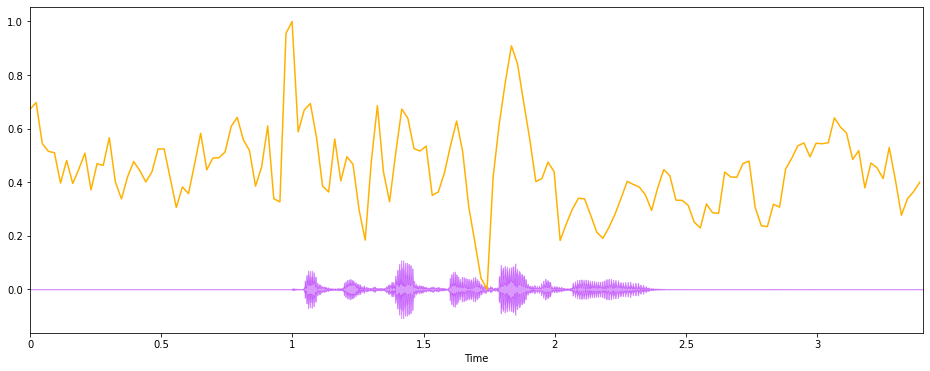

In [ ]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

mfccs shape: (20, 147)


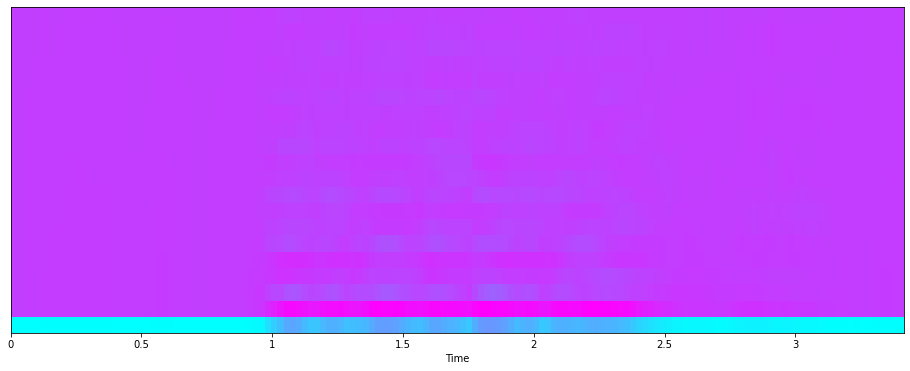

In [ ]:
#Mel-Frequency Cepstral Coefficients:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Mean: 2.9194112e-09 

Var: 1.0


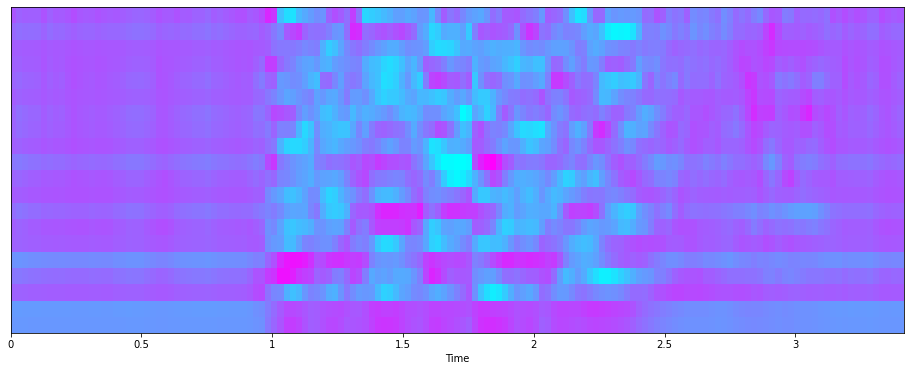

In [ ]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Chromogram shape: (12, 16)


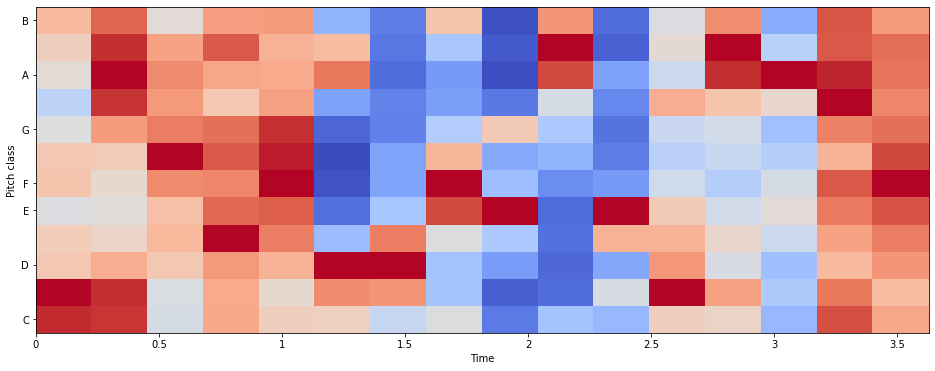

In [ ]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');


In [ ]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()